# Gaussian Naive Bayes Classifier on the MNIST Dataset

This exercise will guide you through the process of implementing a Gaussian Naive Bayes classifier to recognize handwritten digits using the MNIST dataset. You'll get hands-on experience with data preprocessing, model training, prediction, and hyperparameter tuning.




## 1. Getting the Data

The MNIST dataset is a collection of 28x28 grayscale images of handwritten digits. We'll start by loading the dataset and exploring its structure.

In [2]:
#import data (chekc if you should load, fetch, or generate MNIST?)
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Print the shape of X and y to understand the size of the dataset
print(X.shape, y.shape)

(70000, 784) (70000,)


## 2. Data Preprocessing
Before we can train our Gaussian Naive Bayes model, we need to preprocess the data. This will include splitting the data into a training set and a test set.

In [3]:
# TASK: Use train_test_split to split the data into training and test sets.
# The test set should be 1/7 of the whole data.
# Your code here:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


## 3. Training the Gaussian Naive Bayes Model
Now, we'll create a Gaussian Naive Bayes classifier and train it on the dataset.

In [4]:
from sklearn.naive_bayes import GaussianNB

# Create a GaussianNB classifier object
gnb = GaussianNB()

# TASK: Train the classifier on the training data
# Your code here:
gnb.fit(X_train, y_train)

GaussianNB()

## 4. Making Predictions
Once the classifier has been trained, it's time to make predictions on the test set.

In [5]:
# TASK: Make predictions on the test set
# Your code here:
y_pred = gnb.predict(X_test)

# Print out the first few predictions
print(y_pred[:5])

['8' '9' '9' '9' '9']


## 5. Evaluating the Model
We'll evaluate the model's performance by calculating the accuracy and creating a confusion matrix.

Model accuracy: 56.04%


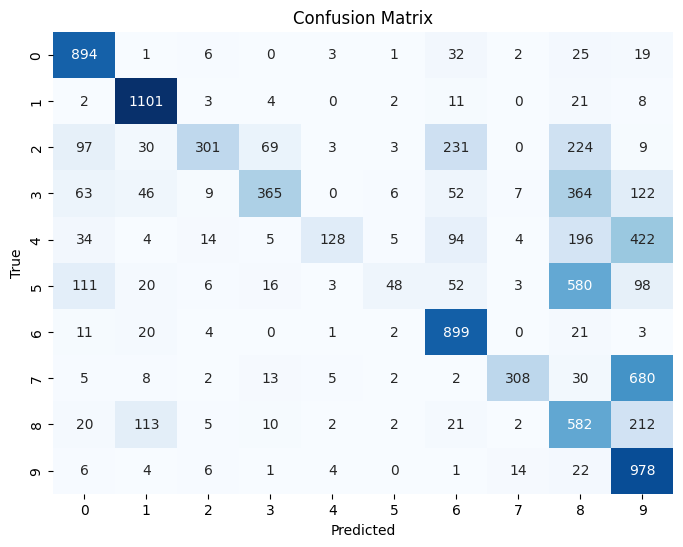

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

# TASK: Calculate the accuracy of the classifier
# Your code here:
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Model accuracy: {accuracy*100:.2f}%")

# TASK: Generate the confusion matrix
# Your code here:
conf_matrix = confusion_matrix(y_test, y_pred)
# Draw the confusion  matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Print the confusion matrix
# print(conf_matrix)

## 6. Hyperparameter Tuning
The GaussianNB class in scikit-learn does not offer many hyperparameters, but one that can be adjusted is var_smoothing. This hyperparameter can be critical in some cases as it accounts for features not present in the learning samples and stabilizes the calculations.

In [9]:
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
tuned_parameters = [{'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04]}]

# TASK: Perform a grid search with cross-validation to find the best value of var_smoothing
# Your code here:
gs = GridSearchCV(GaussianNB(), tuned_parameters, cv=5)
gs.fit(X_train, y_train)

# Print the best parameter and the corresponding score
print(f"Best parameter: {gs.best_params_}")
print(f"Best cross-validation score: {gs.best_score_}")

Best parameter: {'var_smoothing': 0.0001}
Best cross-validation score: 0.6812333333333334


## 7. Conclusion
By completing this exercise, you have gained experience in implementing Gaussian Naive Bayes for classification tasks, predicting results, evaluating the performance of your model, and tuning hyperparameters.

Remember to always reflect on the results. Ask yourself:

* How does the choice of var_smoothing affect the model performance?
* Are there any other preprocessing steps that could improve the classifier's accuracy?
* How does Naive Bayes compare to other classifiers on the MNIST dataset?

You're encouraged to explore further preprocessing and compare the results with other machine learning models.